In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def get_player_data(csv_name):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_name)

    # Access each column and convert it to a Python list
    right_arm = df['Right Arm Angle'].tolist()
    full_body = df['Full Body Angle'].tolist()
    left_leg = df['Left Leg Angle'].tolist()
    time = [i for i in range(len(right_arm))]
    data = [time, right_arm, full_body, left_leg]
    return data

#Load PRO tennis player
pro_data = get_player_data('Jugador.csv')
#Load USER tennis player
user_data = get_player_data('Jugador2.csv')

In [17]:
#Create dataframe
def get_dataframe(pro_data, user_data):

    # Create lists for your data
    tennist = ["Pro"]*len(pro_data[0]) + ["User"]*len(user_data[0])
    time = pro_data[0] + user_data[0]
    right_arm = pro_data[1] + user_data[1]
    full_body = pro_data[2] + user_data[2]
    left_leg = pro_data[3] + user_data[3]

    # Create a DataFrame by specifying the column names and their corresponding lists
    data = {
        'Tennist': tennist,
        'Time': time,
        'Right Arm Angle': right_arm,
        'Full Body Angle': full_body,
        'Left Leg Angle': left_leg
    }

    df = pd.DataFrame(data)

    # Print the DataFrame
    return df

data = get_dataframe(pro_data, user_data)

#Smoothing
# Set the window size for the rolling average
window_size = 10  # Adjust this to your desired window size

# Specify the columns to smooth
columns_to_smooth = ['Right Arm Angle', 'Full Body Angle', 'Left Leg Angle']
# Apply the rolling average to specific columns
smoothed_data = data.copy()
for column in columns_to_smooth:
    smoothed_data[column] = smoothed_data[column].rolling(window=window_size).mean()

print(smoothed_data)

    Tennist  Time  Right Arm Angle  Full Body Angle  Left Leg Angle
0       Pro     0              NaN              NaN             NaN
1       Pro     1              NaN              NaN             NaN
2       Pro     2              NaN              NaN             NaN
3       Pro     3              NaN              NaN             NaN
4       Pro     4              NaN              NaN             NaN
..      ...   ...              ...              ...             ...
769    User   290       175.081487       112.869135      146.107742
770    User   291       175.300424       113.500033      147.110257
771    User   292       175.624017       114.080981      148.240626
772    User   293       175.935804       114.337546      149.303547
773    User   294       176.225125       114.425896      150.359247

[774 rows x 5 columns]


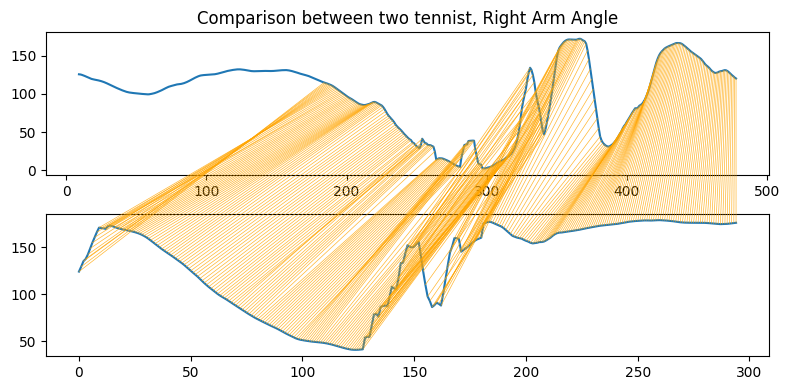

In [22]:
#Dinamic Time Warping
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw


fig, ax = plt.subplots(2,1,figsize=(8, 4))
path = dtw.warping_path(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Right Arm Angle'].tolist(),
                        smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Right Arm Angle'].tolist())
dtwvis.plot_warping(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Right Arm Angle'].tolist(),
                    smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Right Arm Angle'].tolist(),
                    path, 
                    fig=fig, axs=ax)
ax[0].set_title('Comparison between two tennist, Right Arm Angle')
fig.tight_layout()